In [1]:
## Import necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from pandas import ExcelFile
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import math

from folium.plugins import HeatMap
import folium

#plt.style.use('seaborn')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/mahes/OneDrive/Desktop/chicago crime project/Crimes_-_2001_to_Present/Crimes_-_2001_to_Present.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077151 entries, 0 to 8077150
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [4]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13087
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Community Area          613470
FBI Code                     0
X Coordinate             88958
Y Coordinate             88958
Year                         0
Updated On                   0
Latitude                 88958
Longitude                88958
Location                 88958
dtype: int64

In [5]:
print(list(df.columns))

['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location']


In [6]:
df = df[pd.notnull(df['X Coordinate'])]

In [7]:
df = df[pd.notnull(df['Y Coordinate'])]

In [8]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      8348
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    605592
Community Area          604267
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

In [8]:
rows,features = df.shape
print(f"There are {rows} rows and {features} columns ")

There are 8077151 rows and 22 columns 


In [9]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,8.077151e+06,8.077151e+06,8.077104e+06,7.462305e+06,7.463681e+06,7.988193e+06,7.988193e+06,8.077151e+06,7.988193e+06,7.988193e+06
mean,7.251138e+06,1.184977e+03,1.129740e+01,2.276916e+01,3.743256e+01,1.164621e+06,1.885846e+06,2.010428e+03,4.184236e+01,-8.767142e+01
std,3.630950e+06,7.035118e+02,6.958819e+00,1.385516e+01,2.154604e+01,1.698233e+04,3.247292e+04,6.634836e+00,8.934593e-02,6.152950e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.903034e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.153013e+06,1.859117e+06,2.005000e+03,4.176879e+01,-8.771353e+01
50%,7.247163e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166155e+06,1.890829e+06,2.009000e+03,4.185612e+01,-8.766572e+01
75%,1.050030e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176389e+06,1.909358e+06,2.016000e+03,4.190696e+01,-8.762812e+01
max,1.348547e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.024000e+03,4.202291e+01,-8.752453e+01


In [10]:
#DATA CLEANING.
#checking how many duplicates in ID column
np.max(list(df["ID"].value_counts()))

1

In [9]:
import datetime

In [10]:
def to_datetime(s):    
    # getting the date, time and moment (AM or PM)
    date, time, moment = s.split(' ')
    
    # getting month, day and year from the date
    month, day, year = date.split('/')
    
    # getting the hour and minute from time
    hour, minute, _ = time.split(':')
    
    # casting to int
    year = int(year)
    month = int(month)
    day = int(day)
    
    hour = int(hour)
    minute = int(minute)
    
    # we round to the next hour if minute > 30
    if minute > 30:
        hour += 1
    
    if hour >= 12:
        hour -= 12
    
    # we create hour between 0 and 24 
    if moment == 'PM':
        hour += 12
    
    return datetime.datetime(year, month, day, hour)

In [11]:
df['Date'] = df['Date'].apply(to_datetime) 

In [12]:
df['Hour'] = df['Date'].apply(lambda datetime : datetime.time().hour)
df['Day'] = df['Date'].apply(lambda datetime : datetime.date().day)
df['Month'] = df['Date'].apply(lambda datetime : datetime.date().month)

In [14]:
## Casting to 'str'
df['Primary Type'] = df['Primary Type'].apply(lambda o : str(o))
df['Description'] = df['Description'].apply(lambda o : str(o))
df['Location Description'] = df['Location Description'].apply(lambda o : str(o))

In [15]:
##64 The only way to have 'int' type and 'nan' in the same column is to use the 'Int64' type
df['Community Area'] = df['Community Area'].astype({'Community Area' : 'Int64'})

In [16]:
# Filtering the location
df = df[(df['Latitude'] >= 41.00)
                                   & (df['Latitude'] <= 42.5)
                                   & (df['Longitude'] >= -88.00)
                                   & (df['Longitude'] <= -87.00)]

In [11]:
selected_features = ['Date',
                     'Primary Type',
                     'Description',
                     'Location Description',
                     'Arrest',
                     'Domestic',
                     'Community Area',
                     'Year',
                     'Latitude',
                     'Longitude']

In [12]:
#create a new dataframe from old one with selected features.
df_new = df[selected_features].copy()

In [13]:
df_new.head(5)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude
0,08/25/2007 09:22:18 AM,ASSAULT,SIMPLE,OTHER,False,False,1.0,2007,NaN,NaN
1,05/24/2021 03:06:00 PM,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,19.0,2021,41.917838,-87.755969
2,06/26/2021 09:24:00 AM,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,13.0,2021,41.995219,-87.713355
3,11/09/2023 07:30:00 AM,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,5.0,2023,41.952345,-87.677975
4,11/12/2023 07:59:00 AM,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,44.0,2023,41.737751,-87.604856


In [14]:
df_new[['Latitude']].isnull().sum()

Latitude    88958
dtype: int64

In [15]:
df_new[['Longitude']].isnull().sum()

Longitude    88958
dtype: int64

In [16]:
df_new = df_new[pd.notnull(df_new['Latitude'])]

In [17]:
df_new = df_new[pd.notnull(df_new['Latitude'])]

In [18]:
df_new.isnull().sum()

Date                         0
Primary Type                 0
Description                  0
Location Description      8348
Arrest                       0
Domestic                     0
Community Area          604267
Year                         0
Latitude                     0
Longitude                    0
dtype: int64

In [19]:
list(df_new['Location Description'].unique())

['STREET',
 'PARKING LOT',
 'APARTMENT',
 'SMALL RETAIL STORE',
 'PARKING LOT / GARAGE (NON RESIDENTIAL)',
 'RESIDENCE - GARAGE',
 'RESIDENCE - PORCH / HALLWAY',
 'CURRENCY EXCHANGE',
 'RESIDENCE',
 'AUTO / BOAT / RV DEALERSHIP',
 'POLICE FACILITY / VEHICLE PARKING LOT',
 'DEPARTMENT STORE',
 'CHA PARKING LOT / GROUNDS',
 'RESTAURANT',
 'GROCERY FOOD STORE',
 'APPLIANCE STORE',
 'CAR WASH',
 'HOSPITAL BUILDING / GROUNDS',
 'COMMERCIAL / BUSINESS OFFICE',
 'SIDEWALK',
 'DRIVEWAY - RESIDENTIAL',
 'OTHER (SPECIFY)',
 'PARK PROPERTY',
 'ALLEY',
 'BANK',
 'DRUG STORE',
 'VEHICLE NON-COMMERCIAL',
 'RESIDENCE - YARD (FRONT / BACK)',
 'BAR OR TAVERN',
 'LAKEFRONT / WATERFRONT / RIVERBANK',
 'SCHOOL - PUBLIC BUILDING',
 'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
 'NURSING / RETIREMENT HOME',
 'HOTEL / MOTEL',
 'CONVENIENCE STORE',
 'GAS STATION',
 'CTA BUS STOP',
 'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
 'GOVERNMENT BUILDING / PROPERTY',
 'TAVERN / LIQUOR STORE',
 'CTA PLATFORM',
 

In [20]:
import datetime

In [21]:
def to_datetime(s):    
    # getting the date, time and moment (AM or PM)
    date, time, moment = s.split(' ')
    
    # getting month, day and year from the date
    month, day, year = date.split('/')
    
    # getting the hour and minute from time
    hour, minute, _ = time.split(':')
    
    # casting to int
    year = int(year)
    month = int(month)
    day = int(day)
    
    hour = int(hour)
    minute = int(minute)
    
    # we round to the next hour if minute > 30
    if minute > 30:
        hour += 1
    
    if hour >= 12:
        hour -= 12
    
    # we create hour between 0 and 24 
    if moment == 'PM':
        hour += 12
    
    return datetime.datetime(year, month, day, hour)

In [22]:
df_new['Date'] = df_new['Date'].apply(to_datetime) 

In [23]:
df_new['Hour'] = df_new['Date'].apply(lambda datetime : datetime.time().hour)
df_new['Day'] = df_new['Date'].apply(lambda datetime : datetime.date().day)
df_new['Month'] = df_new['Date'].apply(lambda datetime : datetime.date().month)

In [24]:
df_new.head(5)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude,Hour,Day,Month
1,2021-05-24 15:00:00,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,19.0,2021,41.917838,-87.755969,15,24,5
2,2021-06-26 09:00:00,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,13.0,2021,41.995219,-87.713355,9,26,6
3,2023-11-09 07:00:00,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,5.0,2023,41.952345,-87.677975,7,9,11
4,2023-11-12 08:00:00,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,44.0,2023,41.737751,-87.604856,8,12,11
6,2023-09-06 17:00:00,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,32.0,2023,41.886018,-87.633938,17,6,9


In [25]:
## Casting to 'str'
df_new['Primary Type'] = df_new['Primary Type'].apply(lambda o : str(o))
df_new['Description'] = df_new['Description'].apply(lambda o : str(o))
df_new['Location Description'] = df_new['Location Description'].apply(lambda o : str(o))

In [26]:
##64 The only way to have 'int' type and 'nan' in the same column is to use the 'Int64' type
df_new['Community Area'] = df_new['Community Area'].astype({'Community Area' : 'Int64'})

In [27]:
df_new.shape[0]

7988193

In [28]:
# Filtering the location
df_new = df_new[(df_new['Latitude'] >= 41.00)
                                   & (df_new['Latitude'] <= 42.5)
                                   & (df_new['Longitude'] >= -88.00)
                                   & (df_new['Longitude'] <= -87.00)]

In [29]:
df_new.shape[0]

7988044

In [36]:
df_new

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude,Hour,Day,Month
1,2021-05-24 15:00:00,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,19,2021,41.917838,-87.755969,15,24,5
2,2021-06-26 09:00:00,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,13,2021,41.995219,-87.713355,9,26,6
3,2023-11-09 07:00:00,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,5,2023,41.952345,-87.677975,7,9,11
4,2023-11-12 08:00:00,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,44,2023,41.737751,-87.604856,8,12,11
6,2023-09-06 17:00:00,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,32,2023,41.886018,-87.633938,17,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,2023-04-18 08:00:00,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,28,2023,41.887589,-87.642827,8,18,4
8077147,2023-08-07 18:00:00,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,49,2023,41.721698,-87.625345,18,7,8
8077148,2023-06-20 19:00:00,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,30,2023,41.836324,-87.720674,19,20,6
8077149,2023-08-26 00:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,46,2023,41.752631,-87.548737,0,26,8


In [31]:
df_new.isnull().sum()

Date                         0
Primary Type                 0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Community Area          604228
Year                         0
Latitude                     0
Longitude                    0
Hour                         0
Day                          0
Month                        0
dtype: int64

In [36]:
df_new.to_csv("chicago_crime_dataset.csv ")

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

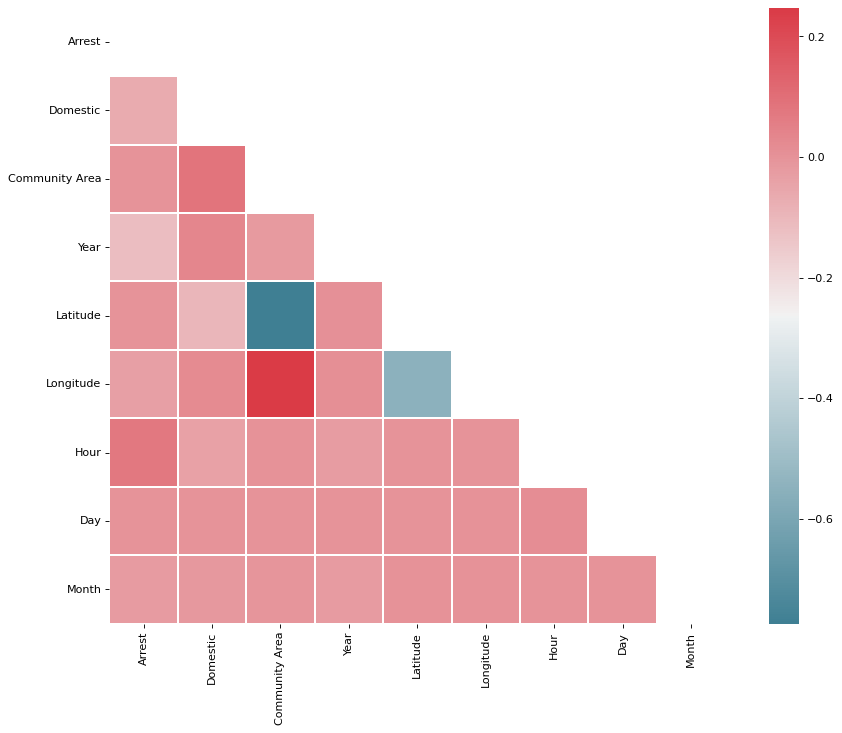

In [33]:
# Create the matrix and the figure.
f, ax = plt.subplots(figsize = (14, 10), dpi = 80)
corr = df_new.corr()

# Create the mask to hide the duplicated cells.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Create the heatmap with the correlation matrix data
sns.heatmap(corr,
            mask = mask,
            cmap = sns.diverging_palette(220, 10, as_cmap = True),
            square = True,
            linewidths = 0.2,
            ax = ax)
plt.show()

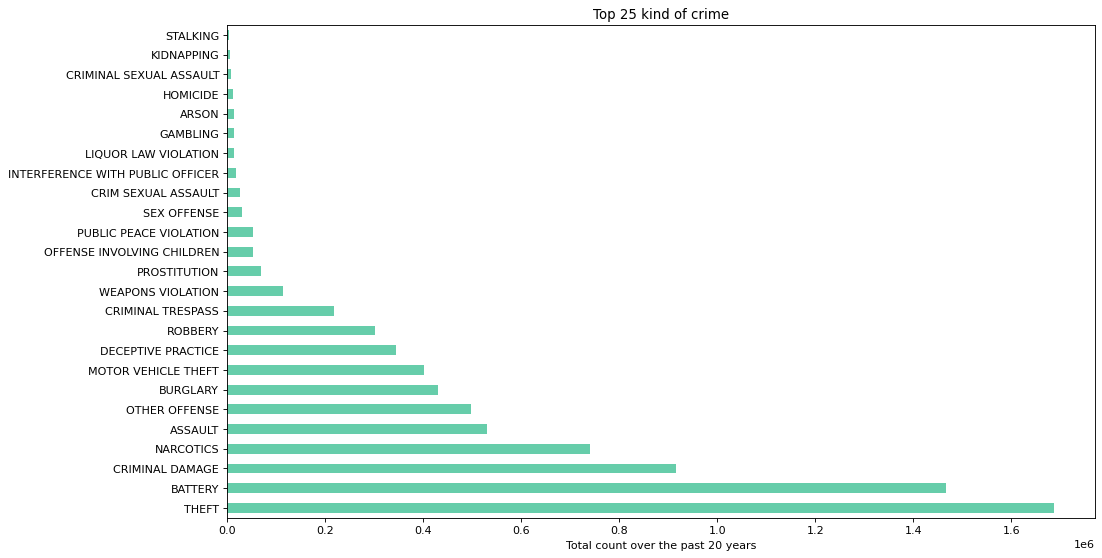

In [41]:
# Plot the 25 most common crimes type
plt.figure(figsize=(14, 8), dpi = 80)
df_new['Primary Type'].value_counts().head(25).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 25 kind of crime')
plt.xlabel('Total count over the past 20 years')
plt.show()

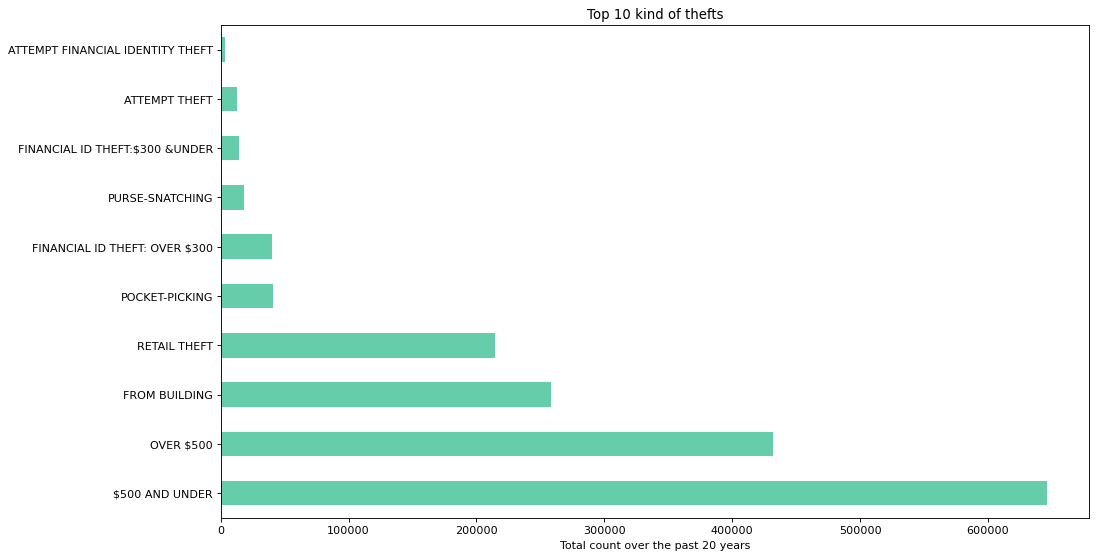

In [43]:
# Selecting all Thefts
thefts = df_new[df_new['Primary Type'] == 'THEFT']

# Plotting the top 10 kind of thefts
plt.figure(figsize=(14, 8), dpi = 80)
thefts['Description'].value_counts().head(10).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 10 kind of thefts')
plt.xlabel('Total count over the past 20 years')
plt.show()

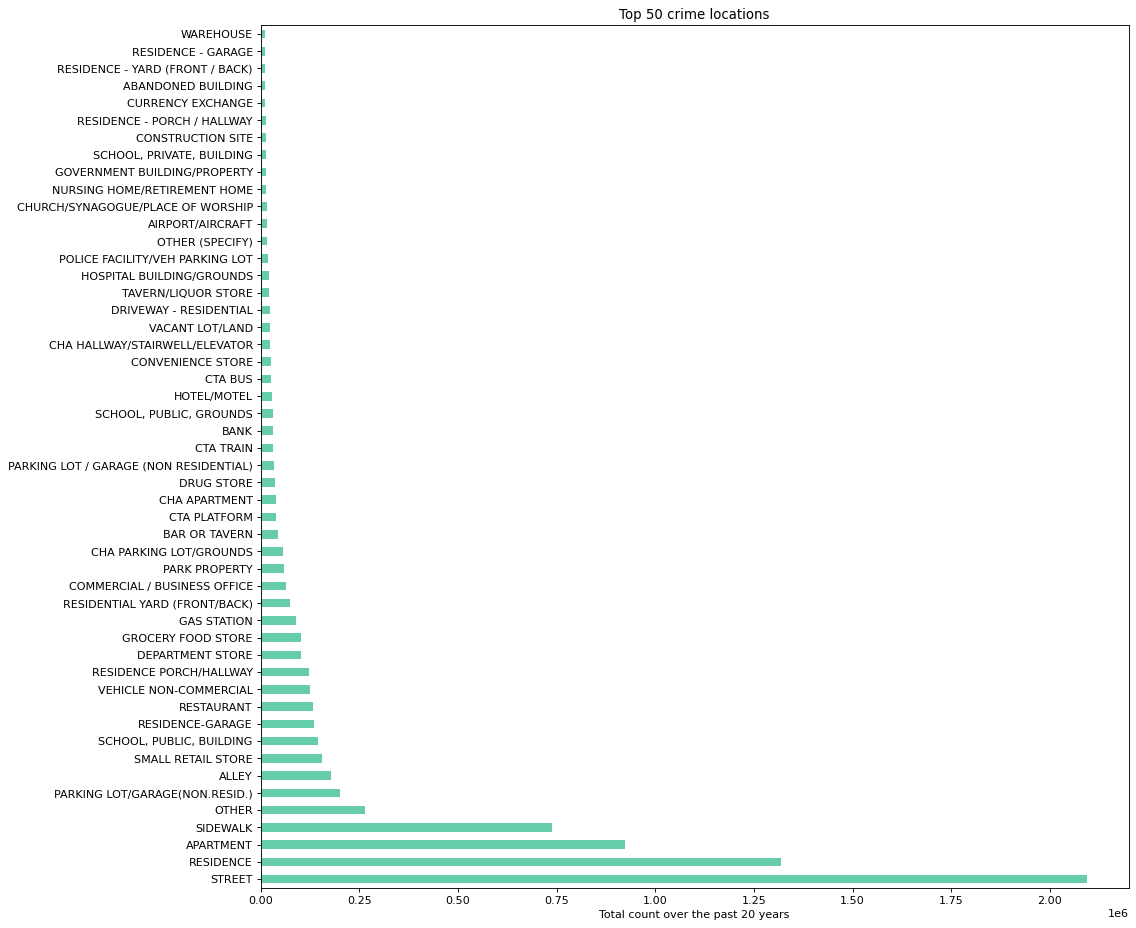

In [45]:
# Plot the 50 most appearning location type
plt.figure(figsize=(14, 14), dpi = 80)
df_new['Location Description'].value_counts().head(50).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 50 crime locations')
plt.xlabel('Total count over the past 20 years')
plt.show()

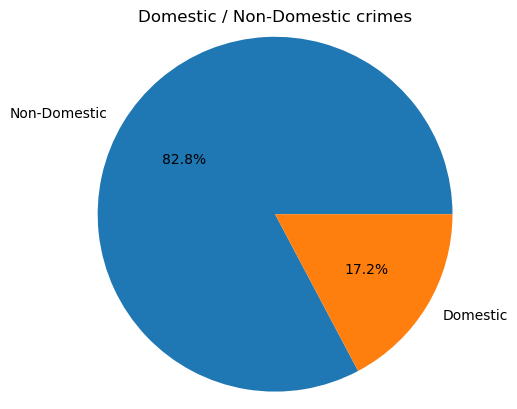

False    6610387
True     1377657
Name: Domestic, dtype: int64


In [46]:
# Show the proportion of Domestic / Non-Domestic crimes:
domestic_count = df_new['Domestic'].value_counts()
ax = domestic_count.plot(kind='pie', labels= ['Non-Domestic', 'Domestic'], autopct='%1.1f%%',  radius=1.2)
ax.set_ylabel('')
plt.title('Domestic / Non-Domestic crimes')
plt.show()

print(domestic_count)

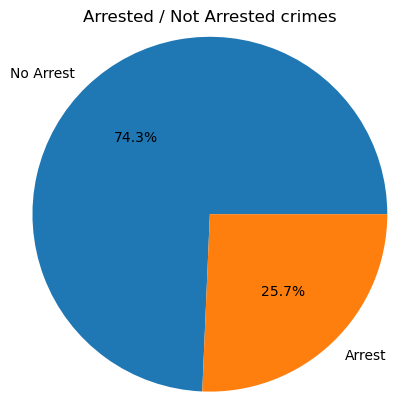

False    5936444
True     2051600
Name: Arrest, dtype: int64


In [47]:
# Show the proportion of Arrest / Not-Arrest crimes:
arrest_count = df_new['Arrest'].value_counts()

ax = arrest_count.plot(kind='pie', labels= ['No Arrest', 'Arrest'], autopct='%1.1f%%',  radius=1.2)
ax.set_ylabel('')
plt.title('Arrested / Not Arrested crimes')
plt.show()

print(arrest_count)

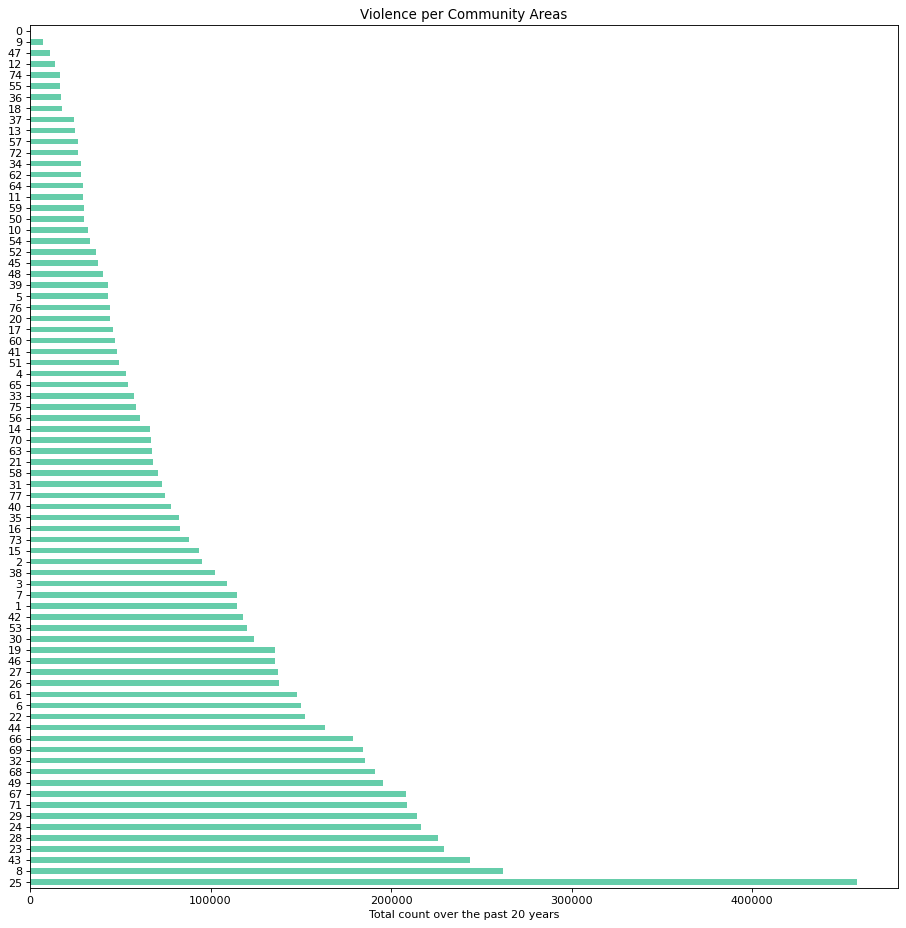

In [48]:
# Selecting 'Community Area' feature and remove missing values
community_areas_count = df_new['Community Area'].dropna().value_counts()

plt.figure(figsize=(14, 14), dpi = 80)
community_areas_count.plot(kind='barh', color='mediumaquamarine')
plt.title('Violence per Community Areas')
plt.xlabel('Total count over the past 20 years')
plt.show()

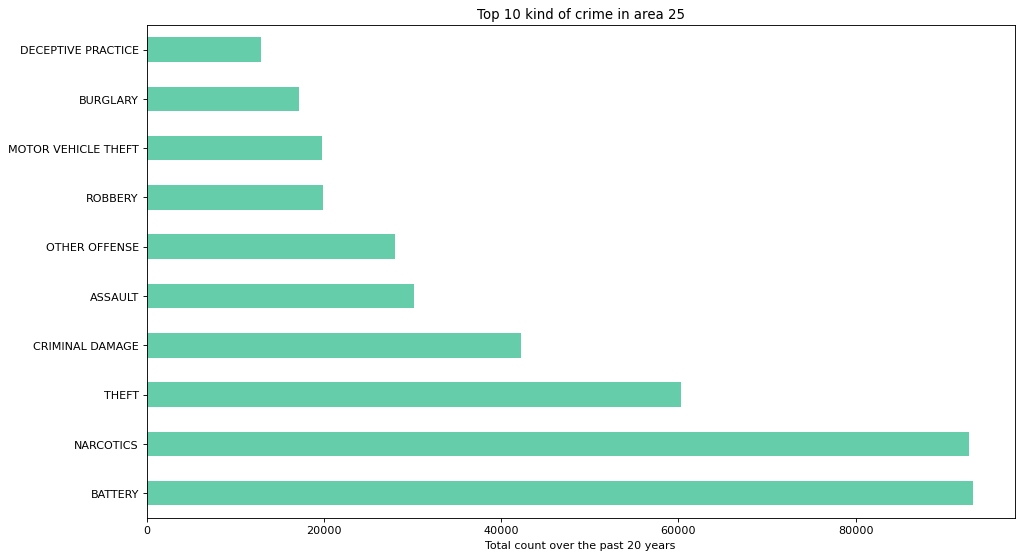

In [50]:
# Selecting crime committed in the Comnmunity Area # 25
chicago_crime_area_25 = df_new[df_new['Community Area'] == 25]

# Plot the 10 most common crime type in area 25
plt.figure(figsize=(14, 8), dpi = 80)
chicago_crime_area_25['Primary Type'].value_counts().head(10).plot(kind='barh', color='mediumaquamarine')
plt.title('Top 10 kind of crime in area 25')
plt.xlabel('Total count over the past 20 years')
plt.show()

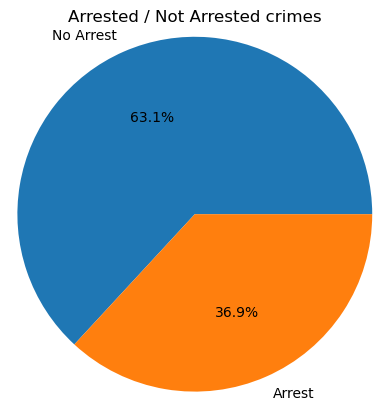

False    288989
True     168856
Name: Arrest, dtype: int64


In [52]:
# Selecting the 'Arrest' feature
arrest_count_area_25 = chicago_crime_area_25['Arrest'].value_counts()

ax = arrest_count_area_25.plot(kind='pie', labels= ['No Arrest', 'Arrest'], autopct='%1.1f%%',  radius=1.2)
ax.set_ylabel('')
plt.title('Arrested / Not Arrested crimes')
plt.show()
print(arrest_count_area_25)

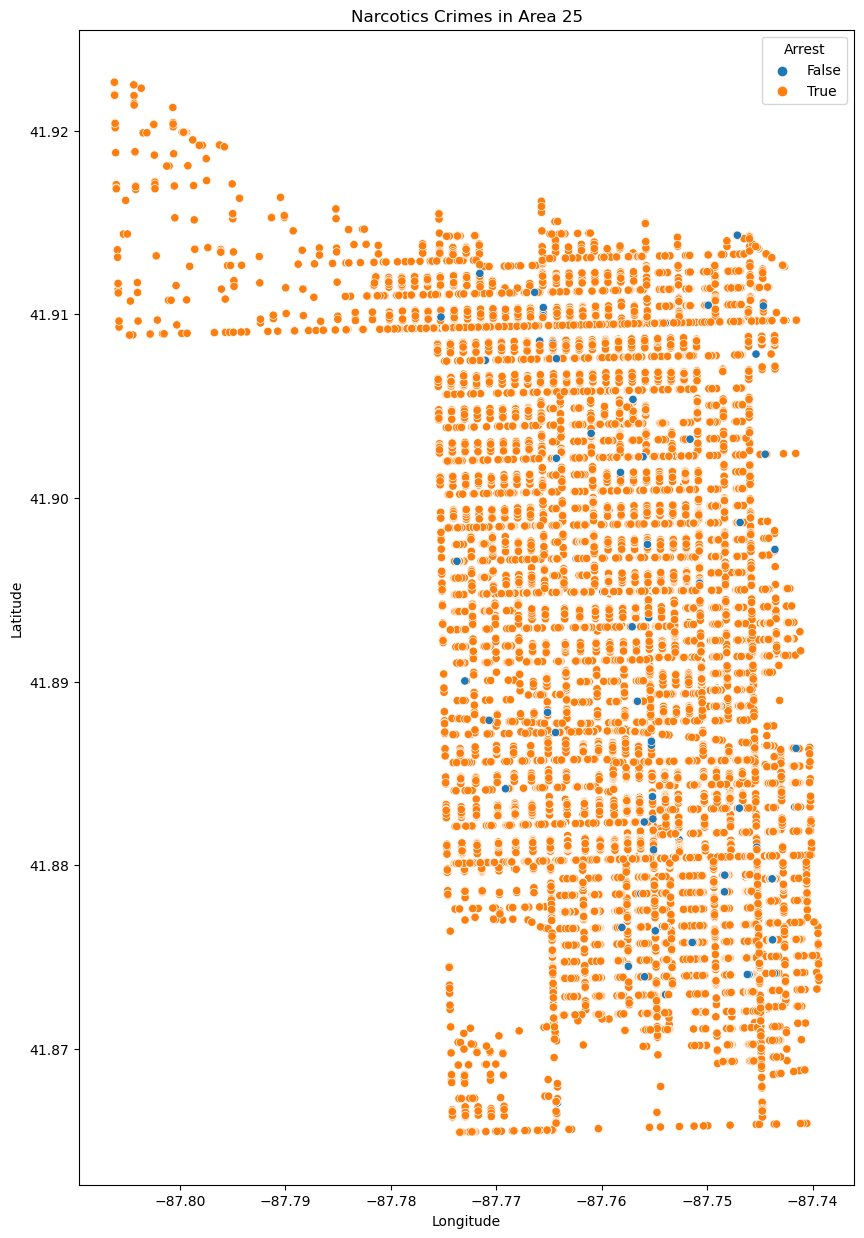

In [53]:
plt.figure(figsize=(10, 15))
sns.scatterplot(x='Longitude', y='Latitude', hue='Arrest', data = chicago_crime_area_25[chicago_crime_area_25['Primary Type'] == 'NARCOTICS'])
plt.title('Narcotics Crimes in Area 25')
plt.show()

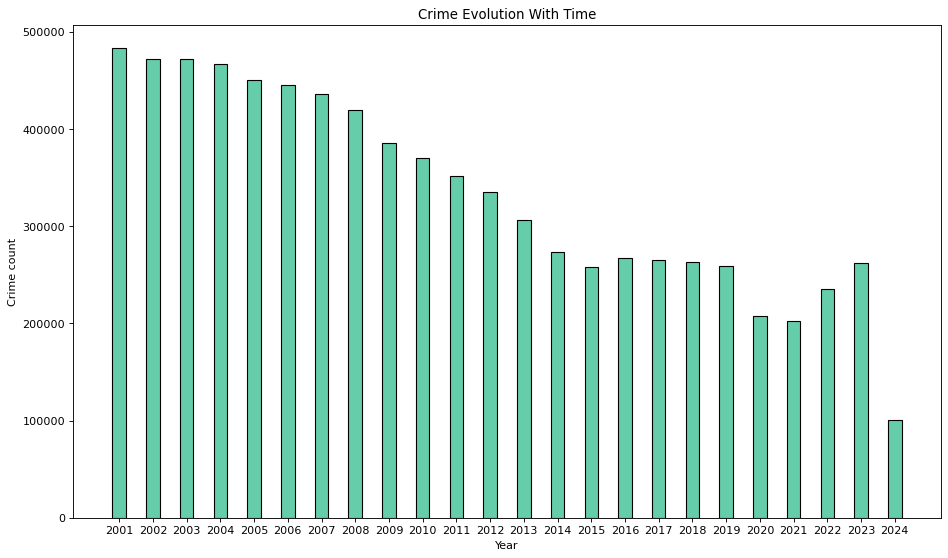

In [55]:
# Plot the crime rate evolution with the years
plt.figure(figsize=(14, 8), dpi = 80)
year_crime = df_new['Year'].value_counts().sort_index()
plt.bar(year_crime.index, year_crime.values, width=0.4, color='mediumaquamarine', edgecolor='black')
plt.xticks(year_crime.index)
plt.title('Crime Evolution With Time')
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.show()

In [56]:
# Selecting crimes that led to an arrest
year_crime_arrest = df_new[df_new['Arrest'] == True]['Year'].value_counts().sort_index()

In [57]:
# Selecting crimes for which the Police never arrested anyone
year_crime_no_arrest = df_new[df_new['Arrest'] == False]['Year'].value_counts().sort_index()

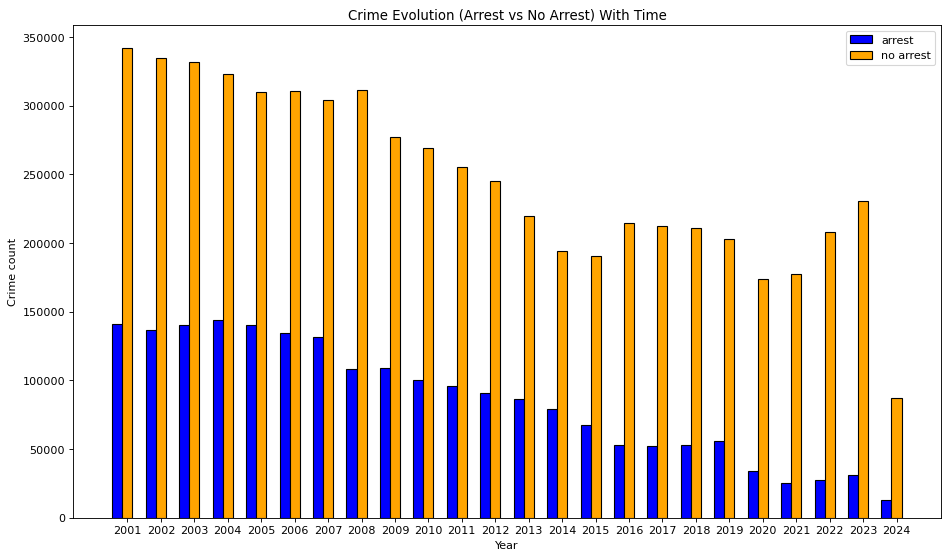

In [58]:
plt.figure(figsize=(14, 8), dpi = 80)
barWidth = 0.3

# Arrest
bars1 = year_crime_arrest.values

# No arrest
bars2 = year_crime_no_arrest.values
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create Arrest bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='arrest')
 
# Create No Arrest bars
plt.bar(r2, bars2, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='no arrest')
 
plt.xticks([r + barWidth for r in range(len(bars1))], year_crime_arrest.index)
plt.title('Crime Evolution (Arrest vs No Arrest) With Time')
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.legend()
plt.show()


In [59]:
def toMonth(number):
    if number == 1:
        return 'January'
    elif number == 2:
        return 'February'
    elif number == 3:
        return 'March'
    elif number == 4:
        return 'April'
    elif number == 5:
        return 'May'
    elif number == 6:
        return 'June'
    elif number == 7:
        return 'July'
    elif number == 8:
        return 'August'
    elif number == 9:
        return 'September'
    elif number == 10:
        return 'October'
    elif number == 11:
        return 'November'
    elif number == 12:
        return 'December'

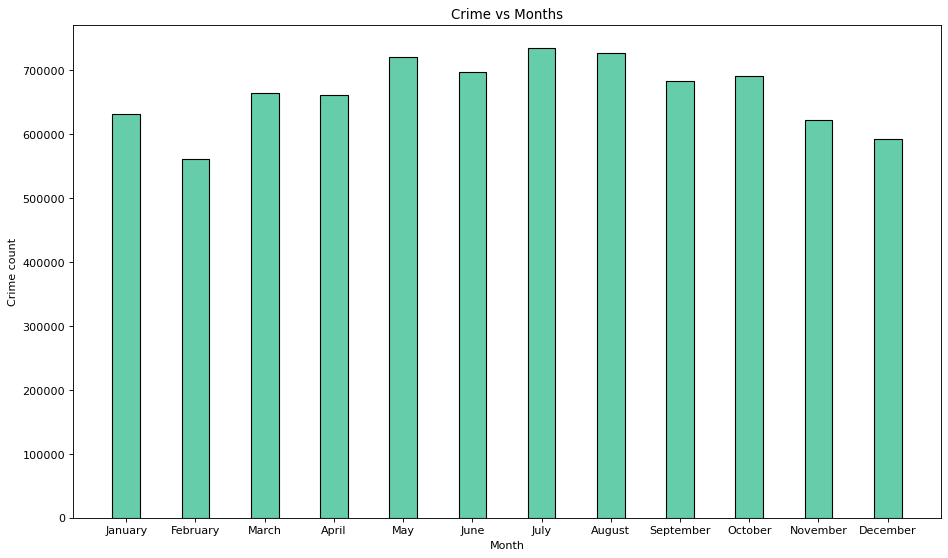

In [61]:
# Plot the crime vs month of the year
plt.figure(figsize=(14, 8), dpi = 80)
month_crime = df_new['Month'].value_counts().sort_index()
plt.bar(month_crime.index, month_crime.values, width=0.4, color='mediumaquamarine', edgecolor='black')
plt.xticks(range(1, len(month_crime.index) + 1), [toMonth(number) for number in month_crime.index])
plt.title('Crime vs Months')
plt.ylabel('Crime count')
plt.xlabel('Month')
plt.show()

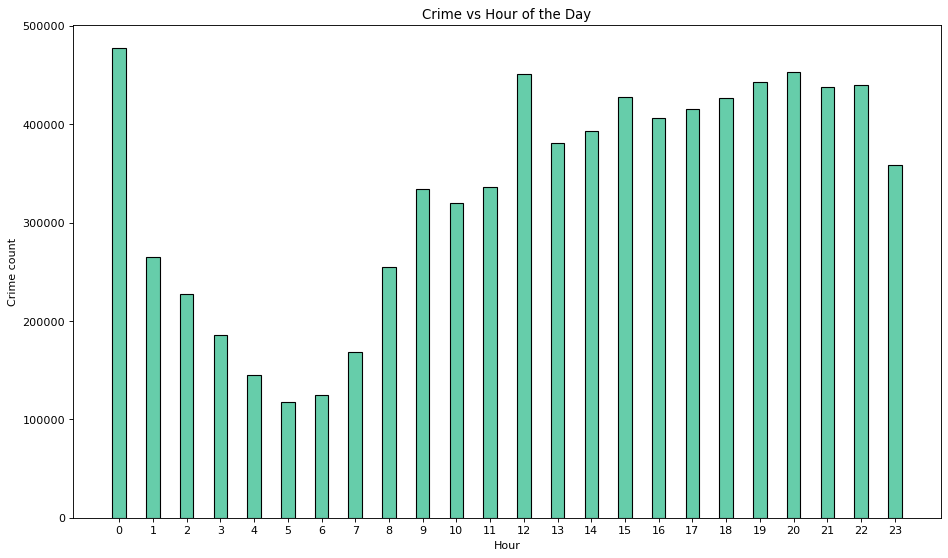

In [63]:
# Plot the crime vs hour of the day
plt.figure(figsize=(14, 8), dpi = 80)
hour_crime = df_new['Hour'].value_counts().sort_index()
plt.bar(hour_crime.index, hour_crime.values, width=0.4, color='mediumaquamarine', edgecolor='black')
plt.xticks(hour_crime.index)
plt.title('Crime vs Hour of the Day')
plt.ylabel('Crime count')
plt.xlabel('Hour')
plt.show()

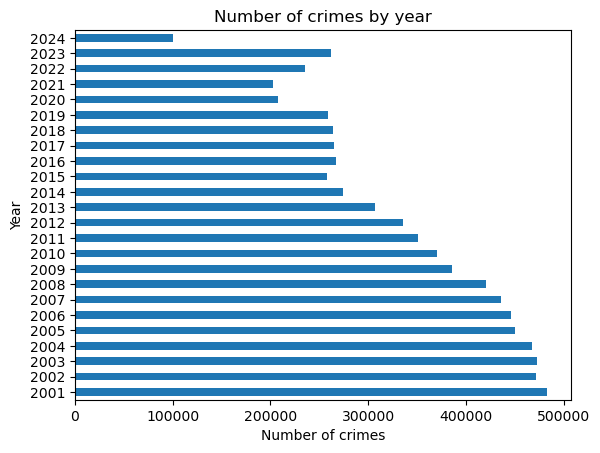

In [40]:
df_new.groupby([df_new.Year]).size().plot(kind='barh')
plt.ylabel('Year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by year')
plt.show()

In [42]:
map_obj = folium.Map(location=[41.881832, -87.623177], tiles='Stamen Toner')
samplePoints = df_new.sample(n = 100, random_state = 42)
for i,j in samplePoints.iterrows():
    folium.Marker(list((j['Latitude'],j['Longitude']))).add_to(map_obj)

In [43]:
map_obj

In [5]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from shapely.geometry import Point

# Assuming you have a DataFrame 'df' with 'latitude' and 'longitude' columns
df['geometry'] = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]


In [7]:
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN,POINT EMPTY
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)",POINT (-87.755968972 41.917838056)
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)",POINT (-87.713354912 41.995219444)
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)",POINT (-87.677975059 41.952345086)
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)",POINT (-87.604855911 41.737750767)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8077146,13047495,JG229914,04/18/2023 08:00:00 AM,003XX N JEFFERSON ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,28.0,11,1172269.0,1902384.0,2023,08/19/2023 03:40:26 PM,41.887589,-87.642827,"(41.887589411, -87.642826595)",POINT (-87.642826595 41.887589411)
8077147,13168300,JG373901,08/07/2023 06:00:00 PM,0000X W 95TH ST,031A,ROBBERY,ARMED - HANDGUN,SIDEWALK,False,False,...,49.0,03,1177527.0,1841973.0,2023,08/19/2023 03:40:26 PM,41.721698,-87.625345,"(41.72169837, -87.625345212)",POINT (-87.625345212 41.72169837)
8077148,13114024,JG309527,06/20/2023 07:00:00 PM,031XX S AVERS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,30.0,07,1151205.0,1883542.0,2023,08/19/2023 03:40:26 PM,41.836324,-87.720674,"(41.836323827, -87.720674149)",POINT (-87.720674149 41.836323827)
8077149,13188860,JG398340,08/26/2023 12:00:00 AM,078XX S SOUTH SHORE DR,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,46.0,14,1198338.0,1853426.0,2023,09/02/2023 03:41:45 PM,41.752631,-87.548737,"(41.752631346, -87.548737069)",POINT (-87.548737069 41.752631346)
